In [17]:
import numpy as np  
import matplotlib.pyplot as plt  
import matplotlib.font_manager  
import pandas as pd
from sklearn import svm  
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, precision_recall_curve,confusion_matrix,classification_report
plt.style.use('seaborn')

In [18]:
d = pd.read_csv('C:/Users/jingy/Jupyter/Crime/Theft/CDI_Based/Intensity/CSV/Gray.csv',index_col=0)
d.Class[d['Class']==1] = -1
d.Class[d['Class'] == 0] = 1
display(d.head())

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,Class
0,3702090,2739720,2854980,3068160,2649960,2485995,2292195,1809990,2019345,2029035,...,1352010,1405815,1255110,2045100,4018545,1769190,1391280,1431315,1565955,1
1,4819245,4985505,4026705,3560055,4313835,3674805,2872575,3439695,4167975,3625335,...,4057050,5041860,4095045,4891665,4077705,3265020,3961935,2515830,2644605,1
2,7851195,4989840,4395945,6646065,6017745,3166335,3502425,5639325,3554955,4317915,...,1700085,2575245,4141200,4669560,7806315,3707955,1455795,1919895,4278390,1
3,3223965,1369350,1163310,1288260,2551530,3422610,3066885,2726715,2315145,1997670,...,1544535,1584060,1582275,2380680,2619615,1415505,1608285,2062695,1886490,1
4,2728755,1524135,600525,733125,2108085,2439075,2296785,1847730,1401480,1156170,...,867000,817785,984555,2402355,2595390,1166880,961095,853740,777495,1


In [19]:
data = d
mask = (data['Class'] == 1)

X_train, X_test = train_test_split(data[mask], test_size=0.2, random_state=0)
X_train = X_train.drop(['Class'], axis=1)
X_test = X_test.drop(['Class'], axis=1)
X_nega = data[~mask].drop(['Class'], axis=1)

x_test=np.vstack((X_test,X_nega))
y_test=[1]*len(X_test)+[-1]*len(X_nega)

In [20]:
clf = svm.OneClassSVM(kernel='rbf',nu=0.6)  
clf.fit(X_train)  

y_pred = clf.predict(x_test)  
y_prob = clf.decision_function(x_test)  # the lower, the more normal

fpr,tpr,threshold_svc = metrics.roc_curve(y_test,y_prob)     
auc_svc = metrics.auc(fpr,tpr)   

precision, recall, _ = precision_recall_curve(y_test,y_prob)
pr_auc = auc(recall, precision)

score_svc = metrics.accuracy_score(y_test,y_pred)

print(score_svc)
print(classification_report(y_test, y_pred))

0.7894736842105263
              precision    recall  f1-score   support

          -1       0.88      0.86      0.87       123
           1       0.45      0.48      0.47        29

    accuracy                           0.79       152
   macro avg       0.66      0.67      0.67       152
weighted avg       0.80      0.79      0.79       152



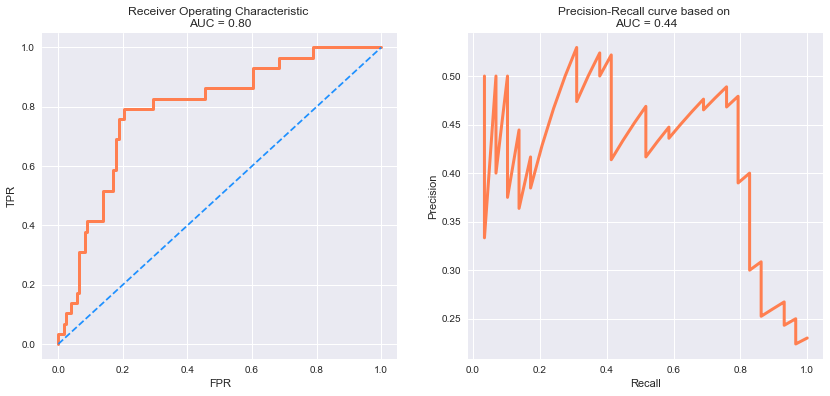

In [21]:
plt.figure(figsize=(14, 6))
plt.subplot(121)
#plt.figure(figsize=(14, 6))
plt.title('Receiver Operating Characteristic \nAUC = %0.2f'% auc_svc)   
plt.plot(fpr, tpr, c='coral', lw=3)
plt.plot([0,1],[0,1], c='dodgerblue', ls='--')
plt.ylabel('TPR'); plt.xlabel('FPR')

plt.subplot(122)
plt.title('Precision-Recall curve based on \nAUC = %0.2f'% pr_auc)
plt.plot(recall[:-2], precision[:-2], c='coral', lw=3)
plt.xlabel('Recall'); plt.ylabel('Precision')
plt.show()